# Import Libraries

In [4]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
%matplotlib inline

## Get the Data

In [5]:
loans=pd.read_csv("loan_data.csv.xls")

In [6]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
loans.describe

<bound method NDFrame.describe of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.0

lets separate the fico scores based on the credit policy outcome

In [9]:
fico_yes = loans[loans['credit.policy']==1]['fico']
fico_no = loans[loans['credit.policy']==0]['fico']

now we create the histogram using seaborn and pandas

<function matplotlib.pyplot.show(close=None, block=None)>

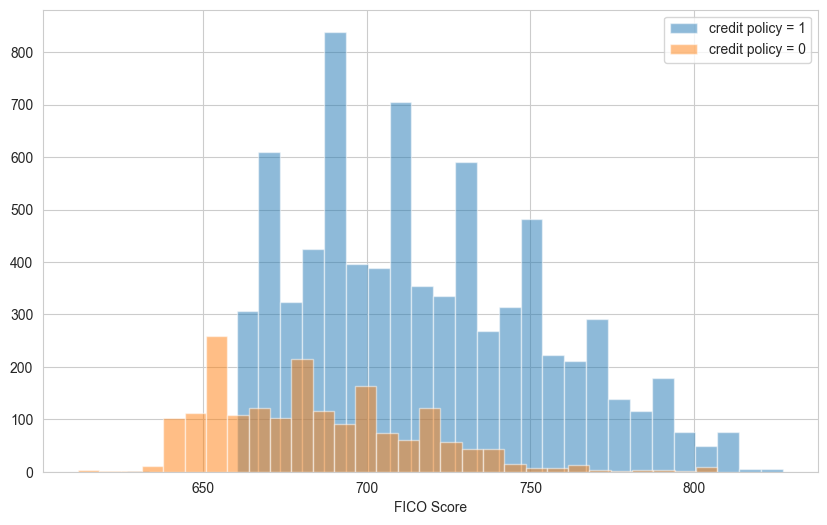

In [10]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.hist(fico_yes, bins=30, alpha=0.5, label='credit policy = 1')
plt.hist(fico_no, bins=30, alpha=0.5, label='credit policy = 0')
plt.xlabel('FICO Score')
plt.legend()
plt.show

lets try the same thing with not.fully.paid column

In [11]:
fico_yes = loans[loans['not.fully.paid']==1]['fico']
fico_no = loans[loans['not.fully.paid']==0]['fico']

<function matplotlib.pyplot.show(close=None, block=None)>

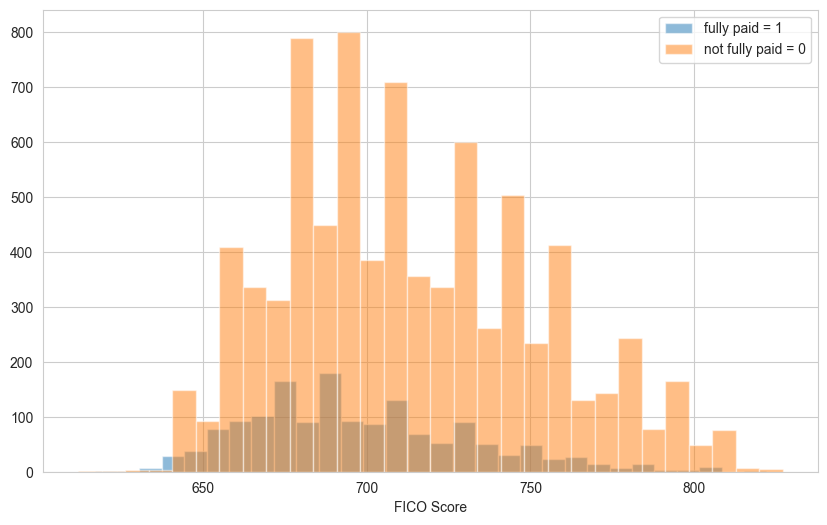

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.hist(fico_yes, bins=30, alpha=0.5, label='fully paid = 1')
plt.hist(fico_no, bins=30, alpha=0.5, label='not fully paid = 0')
plt.xlabel('FICO Score')
plt.legend()
plt.show

we create a countplot showing the the counts of loans by purpose with not.fully.paid

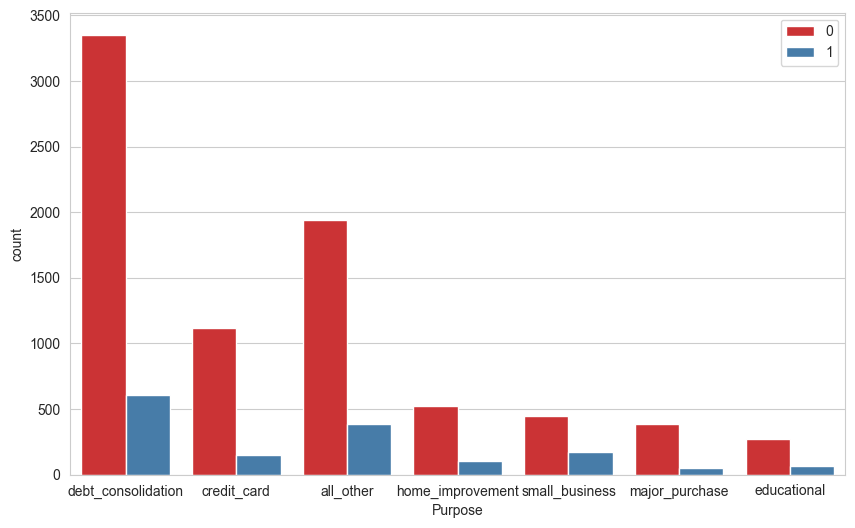

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(x='purpose', hue='not.fully.paid', data=loans, palette='Set1')
plt.xlabel('Purpose')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

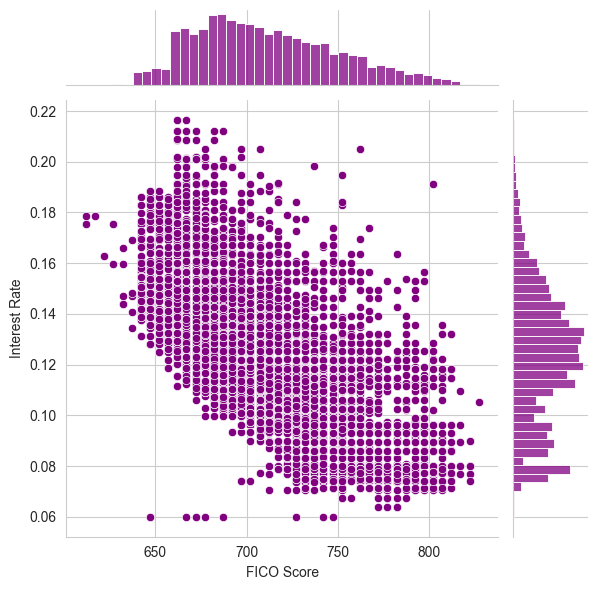

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.jointplot(x='fico', y='int.rate', data=loans, color='purple')
plt.xlabel('FICO Score')
plt.ylabel('Interest Rate')
plt.show()

<Figure size 1000x600 with 0 Axes>

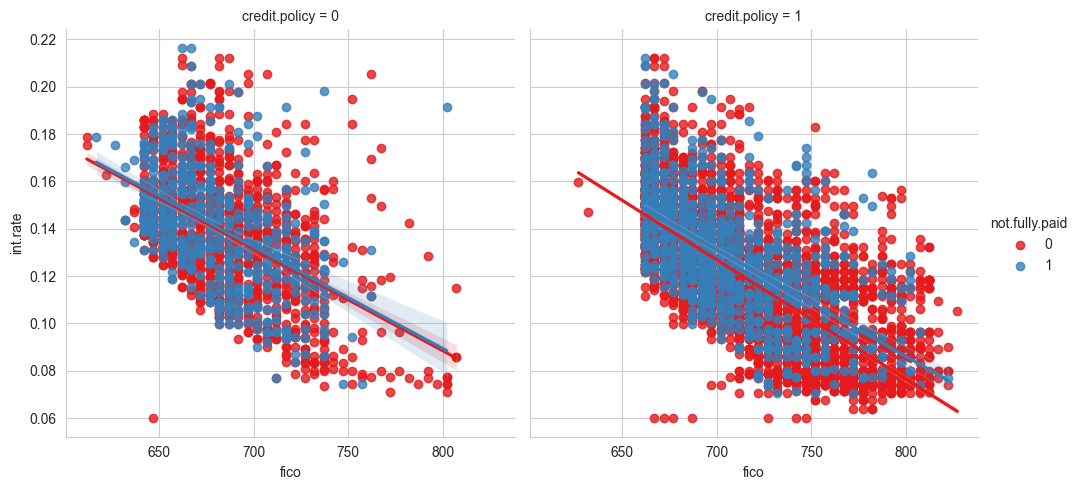

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.lmplot(x='fico', y='int.rate', data=loans, hue='not.fully.paid', col='credit.policy', palette='Set1')
plt.show()

# Setting up the Data
lets get ready to set up our data for our Random Forest Classification

In [16]:
loans.info

<bound method DataFrame.info of       credit.policy             purpose  int.rate  installment  \
0                 1  debt_consolidation    0.1189       829.10   
1                 1         credit_card    0.1071       228.22   
2                 1  debt_consolidation    0.1357       366.86   
3                 1  debt_consolidation    0.1008       162.34   
4                 1         credit_card    0.1426       102.92   
...             ...                 ...       ...          ...   
9573              0           all_other    0.1461       344.76   
9574              0           all_other    0.1253       257.70   
9575              0  debt_consolidation    0.1071        97.81   
9576              0    home_improvement    0.1600       351.58   
9577              0  debt_consolidation    0.1392       853.43   

      log.annual.inc    dti  fico  days.with.cr.line  revol.bal  revol.util  \
0          11.350407  19.48   737        5639.958333      28854        52.1   
1          11.082

In [17]:
cat_feats = ['purpose']

In [18]:
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)

In [19]:
final_data.head

<bound method NDFrame.head of       credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0                 1    0.1189       829.10       11.350407  19.48   737   
1                 1    0.1071       228.22       11.082143  14.29   707   
2                 1    0.1357       366.86       10.373491  11.63   682   
3                 1    0.1008       162.34       11.350407   8.10   712   
4                 1    0.1426       102.92       11.299732  14.97   667   
...             ...       ...          ...             ...    ...   ...   
9573              0    0.1461       344.76       12.180755  10.39   672   
9574              0    0.1253       257.70       11.141862   0.21   722   
9575              0    0.1071        97.81       10.596635  13.09   687   
9576              0    0.1600       351.58       10.819778  19.18   692   
9577              0    0.1392       853.43       11.264464  16.28   732   

      days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delin

## Train Test split
now its time to split split our data into a training set and a testing set

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x = final_data.drop('not.fully.paid',axis=1) # features
y= final_data['not.fully.paid'] # target

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Training a Decision Tree Model
let's start by training a single decision tree first

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
# create an instance of DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [26]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [27]:
predictions = dtree.predict(x_test)

In [28]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2408
           1       0.20      0.21      0.20       466

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.73      0.74      2874



In [29]:
print(confusion_matrix(y_test, predictions))

[[2010  398]
 [ 369   97]]


## Training the Random Forest Model
it's time to train our model

In [34]:
from sklearn.ensemble import RandomForestClassifier


In [31]:
rfc = RandomForestClassifier(n_estimators=100)

In [32]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
predictions = rfc.predict(x_test)

In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.43      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.64      0.51      0.48      2874
weighted avg       0.77      0.84      0.77      2874



In [36]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[2395   13]
 [ 456   10]]
